Information on raw data (from challenge description)

    DATOP - Date of flight
    FLTID - Flight number
    DEPSTN - Departure point
    ARRSTN - Arrival point
    STD - Scheduled Time departure
    STA - Scheduled Time arrival
    STATUS - Flight status
    ETD - Expected Time departure
    ETA - Expected Time arrival
    ATD - Actual Time of Departure
    ATA - Actual Time of arrival
    DELAY1 - Delay code 1
    DUR1 - delay time 1
    DELAY2 - Delay code 2
    DUR2 - delay time 2
    DELAY3 - Delay code 3
    DUR3 - delay time 3
    DELAY4 - Delay code 4
    DUR4 - delay time 4
    AC - Aircraft Code


In [1]:
#import libraries
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
#load data
df = pd.read_csv('data/Train.csv',sep=',')

In [3]:
#user-defined target for classification
target_column = 'target'

## Initial exploration of target column

In [4]:
df[target_column].mean()

48.73301308504818

In [5]:
df[target_column].var()

13720.739905099768

In [6]:
np.sum(df[target_column] > 0) / len(df.target) 

0.6460452737102742

In [7]:
np.sum(df[target_column] == 0) / len(df.target) 

0.3539547262897258

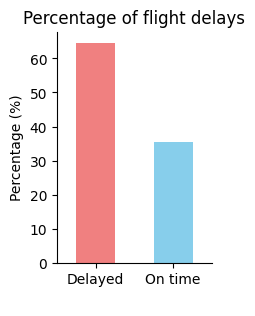

In [8]:
# Calculate the percentage of zero and non-zero values
value_counts = df['target'].apply(lambda x: 'Delayed' if x == 0 else 'On time').value_counts(normalize=True) * 100

# Create the bar plot
plt.figure(figsize=(2, 3))
ax = value_counts.plot(kind='bar', color=['lightcoral', 'skyblue'])

# Set labels and title
ax.set_xticklabels(['Delayed', 'On time'], rotation=0)
ax.set_ylabel('Percentage (%)')
ax.set_title('Percentage of flight delays')
plt.xlabel(' ')
# Remove the upper and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


# Save the figure to file in the folder './plots'
plt.savefig('./plots/Delayed_vs_on_time.png', bbox_inches='tight',transparent=True)

# Show the plot
plt.show()

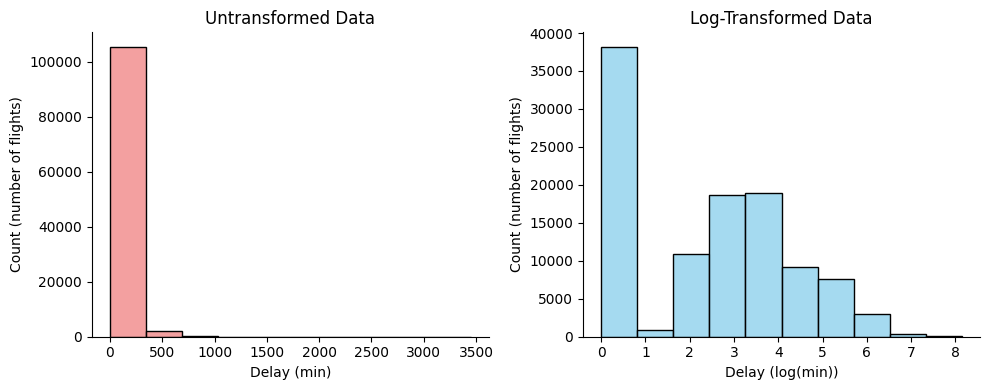

In [9]:
# Step 1: Create a copy of the target column before transformation
df['target_untransformed'] = df['target']

# Step 2: Log-transform the target
df['target_transformed'] = df.target_untransformed.apply(lambda x: np.log1p(x) if x > 0 else 0)

# Step 3: Create subplots to place the histograms side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Plot the untransformed target data on the first subplot
sns.histplot(df['target_untransformed'], bins=10, color='lightcoral', ax=axes[0])
axes[0].set_xlabel('Delay (min)')
axes[0].set_ylabel('Count (number of flights)')
axes[0].set_title('Untransformed Data')
axes[0].spines[['right', 'top']].set_visible(False)

# Plot the log-transformed target data on the second subplot
sns.histplot(df['target_transformed'], bins=10, color='skyblue', ax=axes[1])
axes[1].set_xlabel('Delay (log(min))')
axes[1].set_ylabel('Count (number of flights)')
axes[1].set_title('Log-Transformed Data')
axes[1].spines[['right', 'top']].set_visible(False)

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the figure to file in the folder './plots'
plt.savefig('./plots/Flight_delay_histogram_comparison', bbox_inches='tight', transparent=True)

# Show the plots
plt.show()


## Time information of flight delays

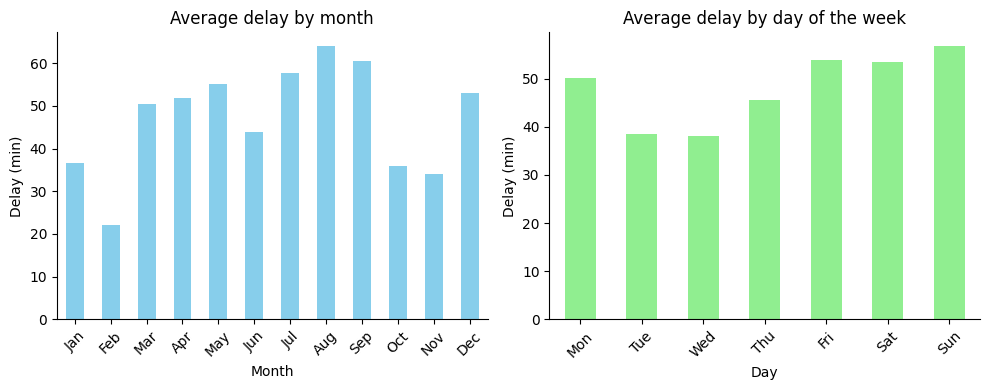

In [10]:
# Step 1: Convert DATOP to datetime format
df['DATOP'] = pd.to_datetime(df['DATOP'])

# Step 2: Extract month and day of the week
df['Month'] = df['DATOP'].dt.month
df['DayOfWeek'] = df['DATOP'].dt.day_name()

df['STD'] = pd.to_datetime(df['STD'])
df['Hour'] = df['STD'].dt.hour

# Step 3: Calculate the average target value by month
avg_by_month = df.groupby('Month')['target'].mean()

# Step 4: Calculate the average target value by day of the week
avg_by_day = df.groupby('DayOfWeek')['target'].mean()

# Step 5: Create subplots to place two bar graphs side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Plot the average target by month on the first subplot
avg_by_month.plot(kind='bar', color='skyblue', ax=axes[0])
axes[0].set_title('Average delay by month')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Delay (min)')
axes[0].set_xticks(np.arange(12))
axes[0].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
axes[0].spines[['right', 'top']].set_visible(False)

# Plot the average target by day of the week on the second subplot
avg_by_day = avg_by_day.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])  # Reorder for better visualization
avg_by_day.plot(kind='bar', color='lightgreen', ax=axes[1])
axes[1].set_title('Average delay by day of the week')
axes[1].set_xlabel('Day')
axes[1].set_ylabel('Delay (min)')
axes[1].set_xticks(np.arange(7))
axes[1].set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=45)
axes[1].spines[['right', 'top']].set_visible(False)

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the figure to file in the folder './plots'
plt.savefig('./plots/Flight_delay_comparison', bbox_inches='tight', transparent=True)

# Show the plots
plt.show()


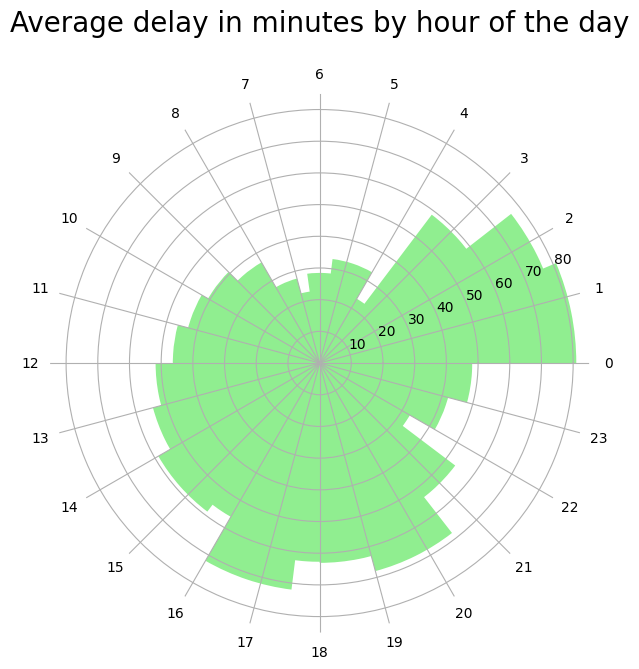

In [11]:
#  Calculate the average target value by hour of the day
avg_by_day = df.groupby('Hour')['target'].mean()

# Plot the average target by hour of the day as a circular barplot
# Setting up the circular layout
categories = avg_by_day.index
values = avg_by_day.values

N = len(categories)
angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()

# The polar coordinates require a closed circle, so we need to repeat the first value
angles += angles[:1]
values = np.append(values, values[0])

# Create the plot
plt.figure(figsize=(7, 7))
ax = plt.subplot(111, polar=True)

# Plot bars
bars = ax.bar(angles[:-1], values[:-1], color='lightgreen', align='edge', width=0.4)

# Add labels to the bars
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)

# Title and labels
plt.title('Average delay in minutes by hour of the day', size=20, color='black', y=1.1)

# Hide some of the frame
ax.spines['polar'].set_visible(False)

# Save the figure to file in the folder './plots'
plt.savefig('./plots/Flight_delay_by_hour_circular', bbox_inches='tight', transparent=True)
plt.show()


## Geographical information on flights

In [12]:
#load airport information, and get geographical locations for plotting
import airportsdata

airports = airportsdata.load('IATA')  # key is the IATA location code
dummy = airports['BER'].copy()
dummy['iata'] = 'SXF' #SFX is not in use anymore, so use a placeholder that is the current berlin airport
airports['SXF'] = dummy

#clean up column names
df.columns = [col.lower() for col in df.columns]

#add latitude and longitude
df['dep_lat'] = df.depstn.apply(lambda x: airports[x]['lat'])
df['dep_lon'] = df.depstn.apply(lambda x: airports[x]['lon'])
df['arr_lat'] = df.arrstn.apply(lambda x: airports[x]['lat'])
df['arr_lon'] = df.arrstn.apply(lambda x: airports[x]['lon'])

#reducde departure and arrival codes to country code
df['dep_country'] = df.depstn.apply(lambda x: airports[x]['country'])
df['arr_country'] = df.arrstn.apply(lambda x: airports[x]['country'])

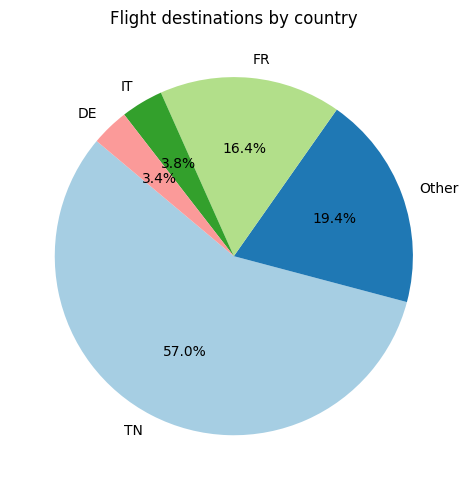

In [13]:
# Function to group small categories into 'Other'
def group_others(series, threshold=0.022):
    # Calculate relative frequencies
    relative_freq = series.value_counts(normalize=True)
    
    # Mask for small categories
    small_categories = relative_freq[relative_freq < threshold].index
    
    # Replace small categories with 'Other'
    return series.replace(small_categories, 'Other')

# Step 1: Group small categories into 'Other'
df['dep_grouped'] = group_others(df['dep_country'])
df['arr_grouped'] = group_others(df['arr_country'])

# Step 2: Calculate the distribution of grouped departure and arrival airports
dep_dist_grouped = df['dep_grouped'].value_counts()
arr_dist_grouped = df['arr_grouped'].value_counts()

# Step 3: Create the pie charts side by side
#fig, axes = plt.subplots(1, 2, figsize=(10, 5))
fig = plt.figure(figsize=(8, 5))

# Arrival airport pie chart
plt.pie(arr_dist_grouped, labels=arr_dist_grouped.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Flight destinations by country')

# Adjust layout to avoid overlap
plt.tight_layout()

# Save the figure to file in the folder './plots'
plt.savefig('./plots/Destination_piechart.png', bbox_inches='tight',transparent=True)

# Show the plot
plt.show()


In [14]:
#plot flight destinations (airport destinations) on a map
import plotly.express as px

df_counts = df[['depstn','dep_lat','dep_lon']].groupby('depstn').mean()
df_counts.reset_index(inplace=True)

fig = px.scatter_mapbox(df_counts, lat="dep_lat", lon="dep_lon", hover_name="depstn", color_discrete_sequence=["#001F3D"], height=700, width= 800, opacity= 0.8, zoom=1)
fig.update_layout(mapbox_style="open-street-map")